In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
dataset=pd.read_csv("Position_Salaries.csv")
print(dataset)
X=dataset.iloc[:,1:-1]
Y=dataset.iloc[:,-1]
print(X)
print(Y)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


# Training Linear Regression model on whole dataset

In [44]:
from sklearn.linear_model import LinearRegression
#It involves only 1 dependent & independent variable. Formula--> y=mx+b
linear_reg = LinearRegression()
linear_reg.fit(X,Y)

LinearRegression()

# Training Polynominal Regression model on whole dataset

In [45]:
#Polynomial Regression Formula-->y=b0+b1x1+b2x1^2+b3x1^3+...bnx1^n(x1^-x1 power)
# We don't need to provide feature scaling in linear regression since we are adding coefficient
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4) #degree(d)=1 represents y=b0+b1x1+b2x1^2. d=3 then upto b3x1^3
x_poly=poly_reg.fit_transform(X) # Adding X value => each level(column) is powered by degree(4)mentioned in above line
print(x_poly)
linear_reg_2=LinearRegression()
linear_reg_2.fit(x_poly,Y)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


LinearRegression()

# Visualising Linear Regression results

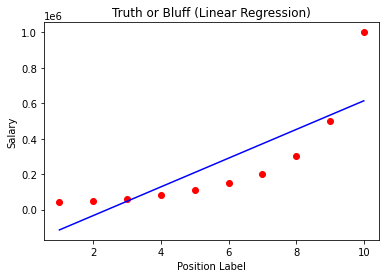

In [46]:
plt.scatter(X,Y,color="red")
plt.plot(X, linear_reg.predict(X), color="blue")
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position Label")
plt.ylabel("Salary")
plt.show()

# Visualising Polynominal Regression results

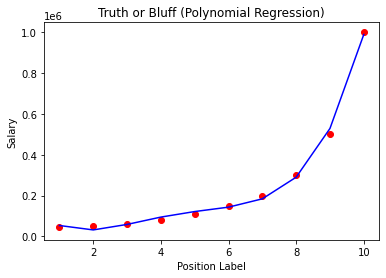

In [47]:
plt.scatter(X,Y,color="red")
plt.plot(X, linear_reg_2.predict(x_poly), color="blue")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position Label")
plt.ylabel("Salary")
plt.show()

# Visualising Polynominal Regression results(for higher resolution and smoother curve) 

In [50]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10


TypeError: unsupported operand type(s) for -: 'str' and 'str'

# Predicting new result with Linear Regression

In [52]:
linear_reg.predict([[6.5]])

array([330378.78787879])

# Predicting new result with Polynomial Regression

In [55]:
#High overfitting since we are considering level 10 which has huge deviation than other points
linear_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])